In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import IPython.display as ipd
import seaborn as sns

import warnings
import os
warnings.filterwarnings('ignore')

from torch import nn, optim
from torchvision import transforms, models, datasets

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pwd

'/home/user/shaheen.perveen/SER_new/Code/Model_Code'

In [ ]:
data_dir = '/root/autodl-tmp/SER/speech-emotion-recognition-iemocap-master/SER_new/IEMOCAP_image_data'
model_save_path = '/root/autodl-tmp/SER/speech-emotion-recognition-iemocap-master/SER_new/saved_models'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'

In [4]:
batch_size = 64

In [6]:
train_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
test_transforms = transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [7]:
trainset = datasets.ImageFolder(train_dir,transform=train_transforms)
testset = datasets.ImageFolder(test_dir,transform=test_transforms)

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [9]:
print(len(testloader.dataset))

894


In [10]:
print(len(trainloader.dataset))

3598


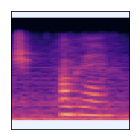

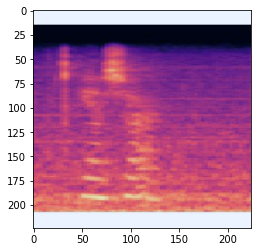

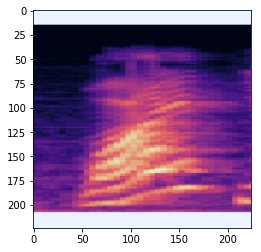

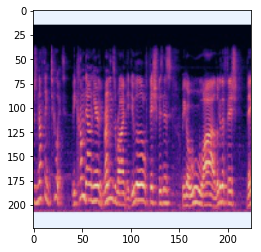

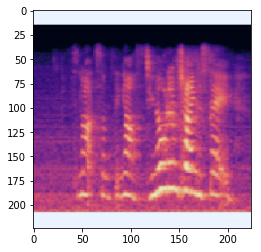

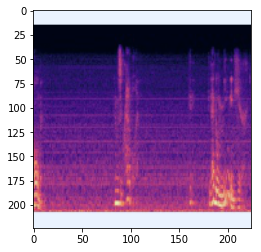

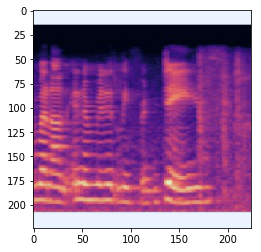

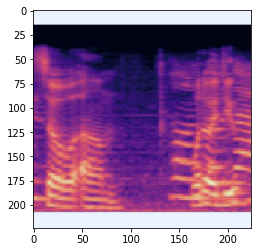

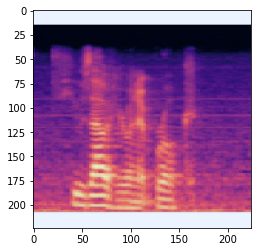

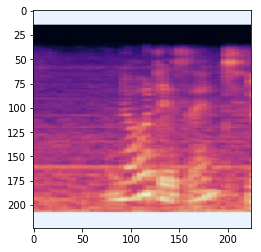

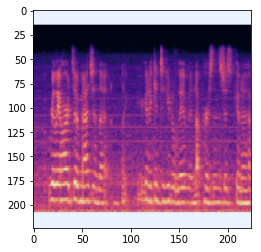

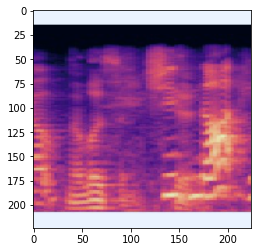

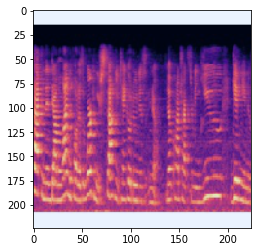

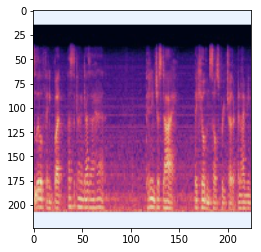

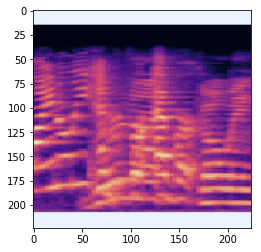

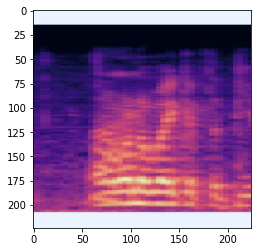

In [ ]:
# def scale(x, out_range=(-1, 1)):
#     domain = np.min(x), np.max(x)
#     y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
#     return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

import numpy as np
import matplotlib.pyplot as plt

# scale 函数将数组归一化到 0 和 1 之间
def scale(x):
    return (x - np.min(x)) / np.ptp(x)

# imshow 函数用于显示图像
def imshow(img):
    img = scale(img)  # 将图像缩放到 [0, 1] 范围内，便于可视化
    plt.imshow(np.transpose(img, (1, 2, 0)))  # 调整通道顺序以匹配 Matplotlib 的显示格式

# 获取一个批次的数据
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()  # 将图像张量转换为 numpy 数组，方便可视化处理

# 创建图像的显示窗口
fig = plt.figure(figsize=(20, 5))

# 循环显示 16 张图像
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16 // 2, idx + 1, xticks=[], yticks=[])  # 使用整数除法，确保列数为整数
    imshow(images[idx])  # 调用 imshow 函数显示图像

plt.show()  # 显示所有图像

In [12]:
trainiter = iter(trainloader)
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [13]:
torch.cuda.is_available()

True

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [299]:
model = models.resnet18(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [300]:
for param in model.parameters():
    param.requires_grad = False

In [301]:
classifier = nn.Sequential(nn.Linear(512, 200),
                           nn.ReLU(),
                          nn.Dropout(p=0.5),
                          nn.Linear(200, 4))
model.fc = classifier

In [302]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [22]:
# print(trainloader.dataset.classes)
print(trainloader.dataset.class_to_idx)

{'anger': 0, 'happiness': 1, 'neutral': 2, 'sadness': 3}


In [23]:
anger = 0
happiness = 0
neutral = 0
sadness = 0

for _, target in trainloader:
    labels = list(target.numpy())
    anger += len([x for x in labels if x == 0])
    happiness += len([x for x in labels if x == 1])
    neutral += len([x for x in labels if x == 2])
    sadness += len([x for x in labels if x == 3])
    
for _, target in testloader:
    labels = list(target.numpy())
    anger += len([x for x in labels if x == 0])
    happiness += len([x for x in labels if x == 1])
    neutral += len([x for x in labels if x == 2])
    sadness += len([x for x in labels if x == 3])

In [24]:
print("anger {} happiness {} neutral {} sadness {}".format(anger, happiness, neutral, sadness))

anger 1104 happiness 595 neutral 1709 sadness 1084


In [25]:
sample_weights = [1/anger, 1/happiness, 1/neutral, 1/sadness]
class_weights = torch.FloatTensor(sample_weights).cuda()
class_weights

tensor([0.0009, 0.0017, 0.0006, 0.0009], device='cuda:0')

In [303]:
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [304]:
# optimizer = optim.RMSprop(model.parameters(), lr=0.0003)
# exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
model = model.to(device)

In [305]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

11,279,916 total parameters.
103,404 training parameters.


In [92]:
labels = list(trainloader.dataset.class_to_idx.keys())
labels

['anger', 'happiness', 'neutral', 'sadness']

In [ ]:
def plot_confusion_matrix(actual, predicted, labels):
    cm = confusion_matrix(actual, predicted, labels=labels)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 10}, fmt='.0f'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    plt.show()

In [307]:
label_to_class = {value: key for key, value in trainloader.dataset.class_to_idx.items()}
label_to_class

{0: 'anger', 1: 'happiness', 2: 'neutral', 3: 'sadness'}

In [308]:
def train(epoch, model):
    model.train()
    correct_train = 0
    train_loss = 0
    train_acc = 0
    
    
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        
        # zero the gradient, forward, backward and running pytorch rhythm
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct_train += pred.eq(target.data.view_as(pred)).cpu().sum()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\n'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item()))
    
    train_loss /= len(trainloader.dataset)
    train_acc = 100. * correct_train / len(trainloader.dataset)
    print('\nTrain set: Average loss: {:.4f}\n'.format(train_loss))
    print('\nTrain Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct_train, len(trainloader.dataset), 100. * correct_train / len(trainloader.dataset)))
    
    return train_loss, int(train_acc.numpy())
            

In [309]:
def test(model):
    model.eval()
    test_loss = 0
    test_acc = 0
    correct = 0
    history_test = []

    pred_model = []
    actual = []

    for data, target in testloader:
        data, target = data.to(device), target.to(device)

        # output from model
        output = model(data)

        # sum total loss
        test_loss += criterion(output, target).item()

        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

        pred_model.append(pred.cpu().numpy())
        actual.append(target.data.cpu().numpy())


    test_loss /= len(testloader.dataset)
    test_acc = 100. * correct / len(testloader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))


    pred_with_label = [label_to_class[label] for label in list(np.concatenate(pred_model))]
    actual_with_label = [label_to_class[label] for label in list(np.concatenate(actual))]

    plot_confusion_matrix(actual_with_label, pred_with_label, labels)

    print('\n Classification Report \n {} \n'.format(classification_report(actual_with_label, pred_with_label)))

    return test_loss, int(test_acc.numpy())

Train Epoch: 1 [0/3598 (0%)]	Loss: 1.475055

Train Epoch: 1 [640/3598 (18%)]	Loss: 1.411882

Train Epoch: 1 [1280/3598 (35%)]	Loss: 1.364870

Train Epoch: 1 [1920/3598 (53%)]	Loss: 1.429241

Train Epoch: 1 [2560/3598 (70%)]	Loss: 1.362510

Train Epoch: 1 [3200/3598 (88%)]	Loss: 1.364709


Train set: Average loss: 0.0220


Train Accuracy: 999/3598 (27%)


Test set: Average loss: 0.0207, Accuracy: 371/894 (41%)



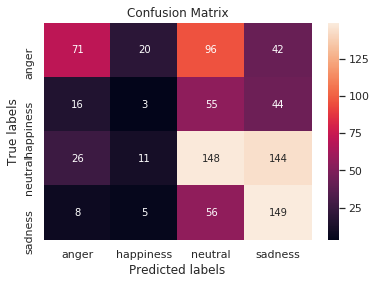


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.31      0.41       229
  happiness       0.08      0.03      0.04       118
    neutral       0.42      0.45      0.43       329
    sadness       0.39      0.68      0.50       218

avg / total       0.41      0.41      0.39       894
 

Train Epoch: 2 [0/3598 (0%)]	Loss: 1.388231

Train Epoch: 2 [640/3598 (18%)]	Loss: 1.316404

Train Epoch: 2 [1280/3598 (35%)]	Loss: 1.339289

Train Epoch: 2 [1920/3598 (53%)]	Loss: 1.337609

Train Epoch: 2 [2560/3598 (70%)]	Loss: 1.266946

Train Epoch: 2 [3200/3598 (88%)]	Loss: 1.295158


Train set: Average loss: 0.0211


Train Accuracy: 1315/3598 (36%)


Test set: Average loss: 0.0203, Accuracy: 409/894 (45%)



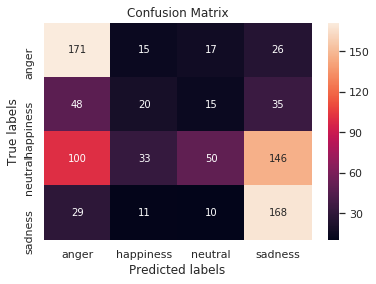


 Classification Report 
              precision    recall  f1-score   support

      anger       0.49      0.75      0.59       229
  happiness       0.25      0.17      0.20       118
    neutral       0.54      0.15      0.24       329
    sadness       0.45      0.77      0.57       218

avg / total       0.47      0.46      0.40       894
 

Train Epoch: 3 [0/3598 (0%)]	Loss: 1.284455

Train Epoch: 3 [640/3598 (18%)]	Loss: 1.258983

Train Epoch: 3 [1280/3598 (35%)]	Loss: 1.353736

Train Epoch: 3 [1920/3598 (53%)]	Loss: 1.380595

Train Epoch: 3 [2560/3598 (70%)]	Loss: 1.297525

Train Epoch: 3 [3200/3598 (88%)]	Loss: 1.259443


Train set: Average loss: 0.0205


Train Accuracy: 1501/3598 (41%)


Test set: Average loss: 0.0196, Accuracy: 434/894 (48%)



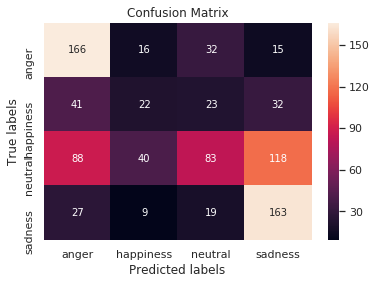


 Classification Report 
              precision    recall  f1-score   support

      anger       0.52      0.72      0.60       229
  happiness       0.25      0.19      0.21       118
    neutral       0.53      0.25      0.34       329
    sadness       0.50      0.75      0.60       218

avg / total       0.48      0.49      0.45       894
 

Train Epoch: 4 [0/3598 (0%)]	Loss: 1.288373

Train Epoch: 4 [640/3598 (18%)]	Loss: 1.274733

Train Epoch: 4 [1280/3598 (35%)]	Loss: 1.265950

Train Epoch: 4 [1920/3598 (53%)]	Loss: 1.197444

Train Epoch: 4 [2560/3598 (70%)]	Loss: 1.240579

Train Epoch: 4 [3200/3598 (88%)]	Loss: 1.236390


Train set: Average loss: 0.0199


Train Accuracy: 1552/3598 (43%)


Test set: Average loss: 0.0190, Accuracy: 453/894 (50%)



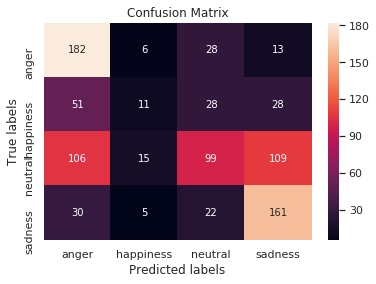


 Classification Report 
              precision    recall  f1-score   support

      anger       0.49      0.79      0.61       229
  happiness       0.30      0.09      0.14       118
    neutral       0.56      0.30      0.39       329
    sadness       0.52      0.74      0.61       218

avg / total       0.50      0.51      0.47       894
 

Train Epoch: 5 [0/3598 (0%)]	Loss: 1.214172

Train Epoch: 5 [640/3598 (18%)]	Loss: 1.204845

Train Epoch: 5 [1280/3598 (35%)]	Loss: 1.164312

Train Epoch: 5 [1920/3598 (53%)]	Loss: 1.193873

Train Epoch: 5 [2560/3598 (70%)]	Loss: 1.200857

Train Epoch: 5 [3200/3598 (88%)]	Loss: 1.186934


Train set: Average loss: 0.0195


Train Accuracy: 1652/3598 (45%)


Test set: Average loss: 0.0185, Accuracy: 474/894 (53%)



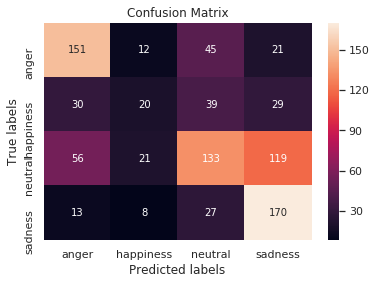


 Classification Report 
              precision    recall  f1-score   support

      anger       0.60      0.66      0.63       229
  happiness       0.33      0.17      0.22       118
    neutral       0.55      0.40      0.46       329
    sadness       0.50      0.78      0.61       218

avg / total       0.52      0.53      0.51       894
 

Train Epoch: 6 [0/3598 (0%)]	Loss: 1.240719

Train Epoch: 6 [640/3598 (18%)]	Loss: 1.216905

Train Epoch: 6 [1280/3598 (35%)]	Loss: 1.188975

Train Epoch: 6 [1920/3598 (53%)]	Loss: 1.245737

Train Epoch: 6 [2560/3598 (70%)]	Loss: 1.209323

Train Epoch: 6 [3200/3598 (88%)]	Loss: 1.202901


Train set: Average loss: 0.0192


Train Accuracy: 1701/3598 (47%)


Test set: Average loss: 0.0182, Accuracy: 478/894 (53%)



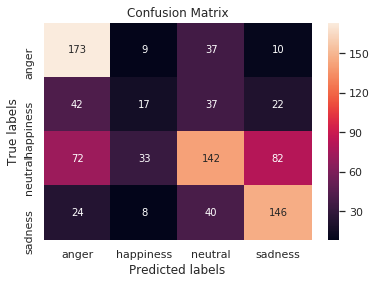


 Classification Report 
              precision    recall  f1-score   support

      anger       0.56      0.76      0.64       229
  happiness       0.25      0.14      0.18       118
    neutral       0.55      0.43      0.49       329
    sadness       0.56      0.67      0.61       218

avg / total       0.52      0.53      0.52       894
 

Train Epoch: 7 [0/3598 (0%)]	Loss: 1.152646

Train Epoch: 7 [640/3598 (18%)]	Loss: 1.154270

Train Epoch: 7 [1280/3598 (35%)]	Loss: 1.245572

Train Epoch: 7 [1920/3598 (53%)]	Loss: 1.111942

Train Epoch: 7 [2560/3598 (70%)]	Loss: 1.176039

Train Epoch: 7 [3200/3598 (88%)]	Loss: 1.132251


Train set: Average loss: 0.0188


Train Accuracy: 1728/3598 (48%)


Test set: Average loss: 0.0182, Accuracy: 428/894 (47%)



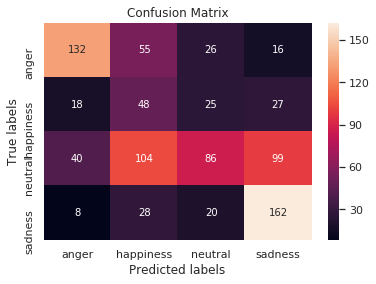


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.58      0.62       229
  happiness       0.20      0.41      0.27       118
    neutral       0.55      0.26      0.35       329
    sadness       0.53      0.74      0.62       218

avg / total       0.53      0.48      0.48       894
 

Train Epoch: 8 [0/3598 (0%)]	Loss: 1.124521

Train Epoch: 8 [640/3598 (18%)]	Loss: 1.173526

Train Epoch: 8 [1280/3598 (35%)]	Loss: 1.179224

Train Epoch: 8 [1920/3598 (53%)]	Loss: 1.113518

Train Epoch: 8 [2560/3598 (70%)]	Loss: 1.242438

Train Epoch: 8 [3200/3598 (88%)]	Loss: 1.122501


Train set: Average loss: 0.0186


Train Accuracy: 1727/3598 (47%)


Test set: Average loss: 0.0177, Accuracy: 485/894 (54%)



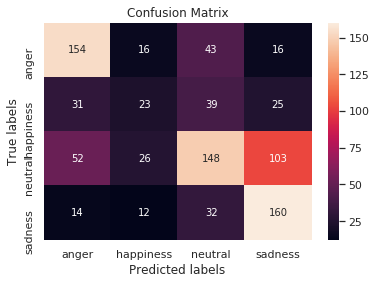


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.67      0.64       229
  happiness       0.30      0.19      0.24       118
    neutral       0.56      0.45      0.50       329
    sadness       0.53      0.73      0.61       218

avg / total       0.53      0.54      0.53       894
 

Train Epoch: 9 [0/3598 (0%)]	Loss: 1.156829

Train Epoch: 9 [640/3598 (18%)]	Loss: 1.171394

Train Epoch: 9 [1280/3598 (35%)]	Loss: 1.140317

Train Epoch: 9 [1920/3598 (53%)]	Loss: 1.129671

Train Epoch: 9 [2560/3598 (70%)]	Loss: 1.241629

Train Epoch: 9 [3200/3598 (88%)]	Loss: 1.077122


Train set: Average loss: 0.0183


Train Accuracy: 1771/3598 (49%)


Test set: Average loss: 0.0175, Accuracy: 492/894 (55%)



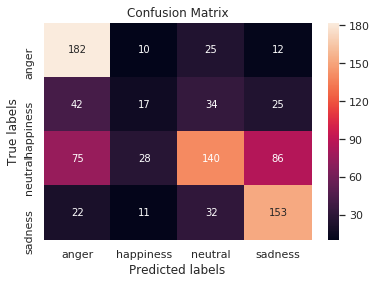


 Classification Report 
              precision    recall  f1-score   support

      anger       0.57      0.79      0.66       229
  happiness       0.26      0.14      0.18       118
    neutral       0.61      0.43      0.50       329
    sadness       0.55      0.70      0.62       218

avg / total       0.54      0.55      0.53       894
 

Train Epoch: 10 [0/3598 (0%)]	Loss: 1.098179

Train Epoch: 10 [640/3598 (18%)]	Loss: 1.130441

Train Epoch: 10 [1280/3598 (35%)]	Loss: 1.231539

Train Epoch: 10 [1920/3598 (53%)]	Loss: 1.134595

Train Epoch: 10 [2560/3598 (70%)]	Loss: 1.200160

Train Epoch: 10 [3200/3598 (88%)]	Loss: 1.117748


Train set: Average loss: 0.0183


Train Accuracy: 1788/3598 (49%)


Test set: Average loss: 0.0174, Accuracy: 486/894 (54%)



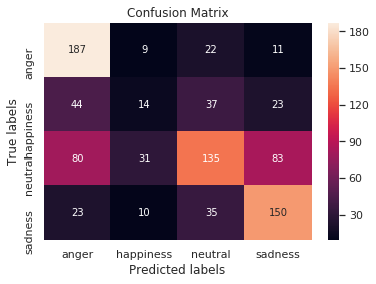


 Classification Report 
              precision    recall  f1-score   support

      anger       0.56      0.82      0.66       229
  happiness       0.22      0.12      0.15       118
    neutral       0.59      0.41      0.48       329
    sadness       0.56      0.69      0.62       218

avg / total       0.53      0.54      0.52       894
 

Train Epoch: 11 [0/3598 (0%)]	Loss: 1.141672

Train Epoch: 11 [640/3598 (18%)]	Loss: 1.082939

Train Epoch: 11 [1280/3598 (35%)]	Loss: 1.070024

Train Epoch: 11 [1920/3598 (53%)]	Loss: 1.106333

Train Epoch: 11 [2560/3598 (70%)]	Loss: 1.135759

Train Epoch: 11 [3200/3598 (88%)]	Loss: 1.147988


Train set: Average loss: 0.0179


Train Accuracy: 1857/3598 (51%)


Test set: Average loss: 0.0175, Accuracy: 450/894 (50%)



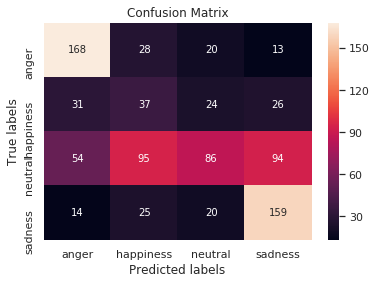


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.73      0.68       229
  happiness       0.20      0.31      0.24       118
    neutral       0.57      0.26      0.36       329
    sadness       0.54      0.73      0.62       218

avg / total       0.53      0.50      0.49       894
 

Train Epoch: 12 [0/3598 (0%)]	Loss: 1.119339

Train Epoch: 12 [640/3598 (18%)]	Loss: 1.203142

Train Epoch: 12 [1280/3598 (35%)]	Loss: 1.090632

Train Epoch: 12 [1920/3598 (53%)]	Loss: 1.234910

Train Epoch: 12 [2560/3598 (70%)]	Loss: 1.106432

Train Epoch: 12 [3200/3598 (88%)]	Loss: 1.125181


Train set: Average loss: 0.0179


Train Accuracy: 1809/3598 (50%)


Test set: Average loss: 0.0173, Accuracy: 473/894 (52%)



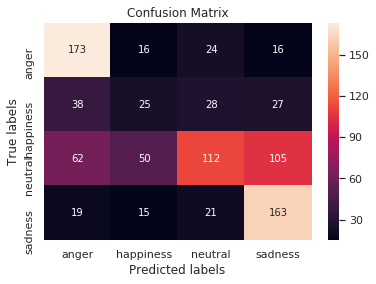


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.76      0.66       229
  happiness       0.24      0.21      0.22       118
    neutral       0.61      0.34      0.44       329
    sadness       0.52      0.75      0.62       218

avg / total       0.53      0.53      0.51       894
 

Train Epoch: 13 [0/3598 (0%)]	Loss: 1.026552

Train Epoch: 13 [640/3598 (18%)]	Loss: 1.120728

Train Epoch: 13 [1280/3598 (35%)]	Loss: 1.074334

Train Epoch: 13 [1920/3598 (53%)]	Loss: 1.109239

Train Epoch: 13 [2560/3598 (70%)]	Loss: 1.060517

Train Epoch: 13 [3200/3598 (88%)]	Loss: 1.083623


Train set: Average loss: 0.0178


Train Accuracy: 1839/3598 (51%)


Test set: Average loss: 0.0171, Accuracy: 483/894 (54%)



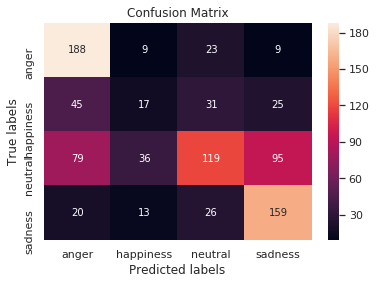


 Classification Report 
              precision    recall  f1-score   support

      anger       0.57      0.82      0.67       229
  happiness       0.23      0.14      0.18       118
    neutral       0.60      0.36      0.45       329
    sadness       0.55      0.73      0.63       218

avg / total       0.53      0.54      0.51       894
 

Train Epoch: 14 [0/3598 (0%)]	Loss: 1.053695

Train Epoch: 14 [640/3598 (18%)]	Loss: 1.245321

Train Epoch: 14 [1280/3598 (35%)]	Loss: 1.026663

Train Epoch: 14 [1920/3598 (53%)]	Loss: 1.085925

Train Epoch: 14 [2560/3598 (70%)]	Loss: 1.021936

Train Epoch: 14 [3200/3598 (88%)]	Loss: 0.960717


Train set: Average loss: 0.0178


Train Accuracy: 1829/3598 (50%)


Test set: Average loss: 0.0171, Accuracy: 477/894 (53%)



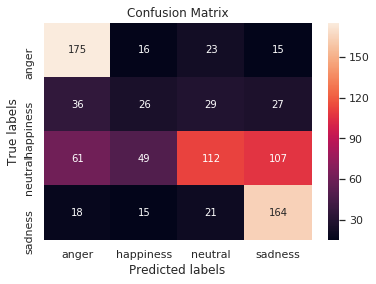


 Classification Report 
              precision    recall  f1-score   support

      anger       0.60      0.76      0.67       229
  happiness       0.25      0.22      0.23       118
    neutral       0.61      0.34      0.44       329
    sadness       0.52      0.75      0.62       218

avg / total       0.54      0.53      0.51       894
 

Train Epoch: 15 [0/3598 (0%)]	Loss: 1.104527

Train Epoch: 15 [640/3598 (18%)]	Loss: 1.110955

Train Epoch: 15 [1280/3598 (35%)]	Loss: 1.007158

Train Epoch: 15 [1920/3598 (53%)]	Loss: 1.036385

Train Epoch: 15 [2560/3598 (70%)]	Loss: 1.127646

Train Epoch: 15 [3200/3598 (88%)]	Loss: 1.055995


Train set: Average loss: 0.0176


Train Accuracy: 1886/3598 (52%)


Test set: Average loss: 0.0169, Accuracy: 487/894 (54%)



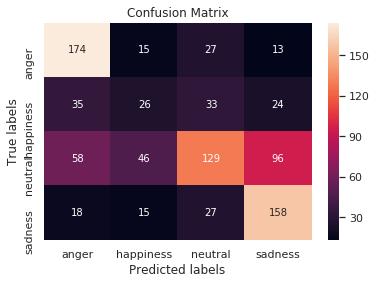


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.76      0.68       229
  happiness       0.25      0.22      0.24       118
    neutral       0.60      0.39      0.47       329
    sadness       0.54      0.72      0.62       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 16 [0/3598 (0%)]	Loss: 1.318159

Train Epoch: 16 [640/3598 (18%)]	Loss: 1.036246

Train Epoch: 16 [1280/3598 (35%)]	Loss: 1.130451

Train Epoch: 16 [1920/3598 (53%)]	Loss: 1.131777

Train Epoch: 16 [2560/3598 (70%)]	Loss: 1.206430

Train Epoch: 16 [3200/3598 (88%)]	Loss: 1.271894


Train set: Average loss: 0.0176


Train Accuracy: 1880/3598 (52%)


Test set: Average loss: 0.0169, Accuracy: 510/894 (57%)



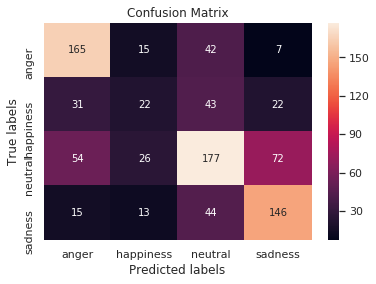


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.72      0.67       229
  happiness       0.29      0.19      0.23       118
    neutral       0.58      0.54      0.56       329
    sadness       0.59      0.67      0.63       218

avg / total       0.55      0.57      0.56       894
 

Train Epoch: 17 [0/3598 (0%)]	Loss: 1.155015

Train Epoch: 17 [640/3598 (18%)]	Loss: 1.189800

Train Epoch: 17 [1280/3598 (35%)]	Loss: 1.152799

Train Epoch: 17 [1920/3598 (53%)]	Loss: 1.093614

Train Epoch: 17 [2560/3598 (70%)]	Loss: 1.000284

Train Epoch: 17 [3200/3598 (88%)]	Loss: 1.016863


Train set: Average loss: 0.0174


Train Accuracy: 1898/3598 (52%)


Test set: Average loss: 0.0167, Accuracy: 501/894 (56%)



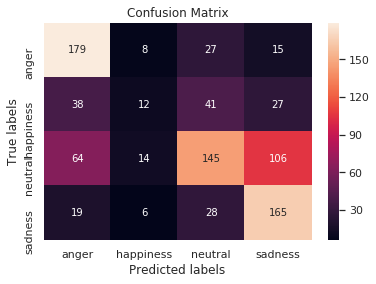


 Classification Report 
              precision    recall  f1-score   support

      anger       0.60      0.78      0.68       229
  happiness       0.30      0.10      0.15       118
    neutral       0.60      0.44      0.51       329
    sadness       0.53      0.76      0.62       218

avg / total       0.54      0.56      0.53       894
 

Train Epoch: 18 [0/3598 (0%)]	Loss: 1.129494

Train Epoch: 18 [640/3598 (18%)]	Loss: 1.028551

Train Epoch: 18 [1280/3598 (35%)]	Loss: 0.987382

Train Epoch: 18 [1920/3598 (53%)]	Loss: 1.203280

Train Epoch: 18 [2560/3598 (70%)]	Loss: 1.070903

Train Epoch: 18 [3200/3598 (88%)]	Loss: 1.136236


Train set: Average loss: 0.0173


Train Accuracy: 1953/3598 (54%)


Test set: Average loss: 0.0172, Accuracy: 446/894 (49%)



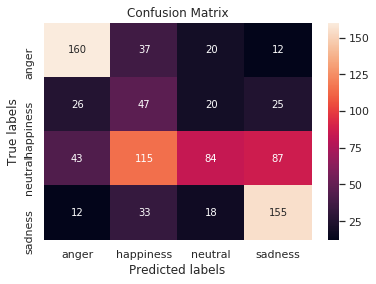


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.70      0.68       229
  happiness       0.20      0.40      0.27       118
    neutral       0.59      0.26      0.36       329
    sadness       0.56      0.71      0.62       218

avg / total       0.55      0.50      0.49       894
 

Train Epoch: 19 [0/3598 (0%)]	Loss: 1.193775

Train Epoch: 19 [640/3598 (18%)]	Loss: 1.167097

Train Epoch: 19 [1280/3598 (35%)]	Loss: 1.139997

Train Epoch: 19 [1920/3598 (53%)]	Loss: 1.172967

Train Epoch: 19 [2560/3598 (70%)]	Loss: 1.206142

Train Epoch: 19 [3200/3598 (88%)]	Loss: 1.084045


Train set: Average loss: 0.0175


Train Accuracy: 1880/3598 (52%)


Test set: Average loss: 0.0167, Accuracy: 497/894 (55%)



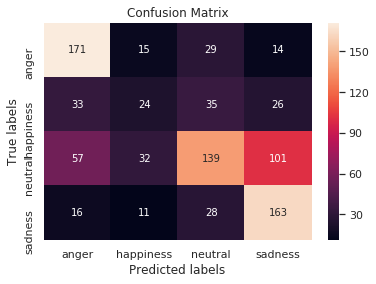


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.75      0.68       229
  happiness       0.29      0.20      0.24       118
    neutral       0.60      0.42      0.50       329
    sadness       0.54      0.75      0.62       218

avg / total       0.55      0.56      0.54       894
 

Train Epoch: 20 [0/3598 (0%)]	Loss: 0.974704

Train Epoch: 20 [640/3598 (18%)]	Loss: 1.131871

Train Epoch: 20 [1280/3598 (35%)]	Loss: 1.074661

Train Epoch: 20 [1920/3598 (53%)]	Loss: 1.036783

Train Epoch: 20 [2560/3598 (70%)]	Loss: 1.077896

Train Epoch: 20 [3200/3598 (88%)]	Loss: 1.083145


Train set: Average loss: 0.0173


Train Accuracy: 1895/3598 (52%)


Test set: Average loss: 0.0167, Accuracy: 487/894 (54%)



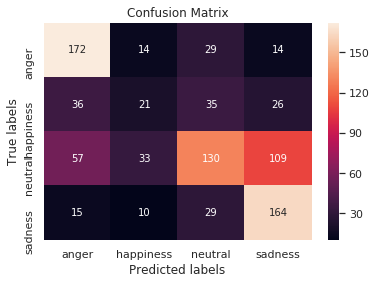


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.75      0.68       229
  happiness       0.27      0.18      0.21       118
    neutral       0.58      0.40      0.47       329
    sadness       0.52      0.75      0.62       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 21 [0/3598 (0%)]	Loss: 1.056859

Train Epoch: 21 [640/3598 (18%)]	Loss: 1.020744

Train Epoch: 21 [1280/3598 (35%)]	Loss: 1.141670

Train Epoch: 21 [1920/3598 (53%)]	Loss: 1.130377

Train Epoch: 21 [2560/3598 (70%)]	Loss: 0.971328

Train Epoch: 21 [3200/3598 (88%)]	Loss: 1.000743


Train set: Average loss: 0.0171


Train Accuracy: 1930/3598 (53%)


Test set: Average loss: 0.0166, Accuracy: 493/894 (55%)



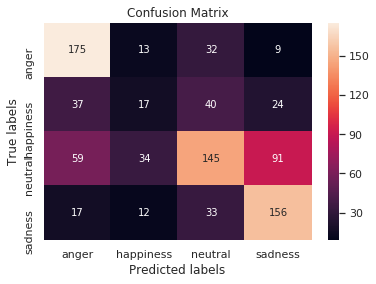


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.76      0.68       229
  happiness       0.22      0.14      0.18       118
    neutral       0.58      0.44      0.50       329
    sadness       0.56      0.72      0.63       218

avg / total       0.53      0.55      0.53       894
 

Train Epoch: 22 [0/3598 (0%)]	Loss: 1.121477

Train Epoch: 22 [640/3598 (18%)]	Loss: 1.276190

Train Epoch: 22 [1280/3598 (35%)]	Loss: 1.088710

Train Epoch: 22 [1920/3598 (53%)]	Loss: 1.051141

Train Epoch: 22 [2560/3598 (70%)]	Loss: 1.054786

Train Epoch: 22 [3200/3598 (88%)]	Loss: 1.161382


Train set: Average loss: 0.0170


Train Accuracy: 1948/3598 (54%)


Test set: Average loss: 0.0165, Accuracy: 500/894 (55%)



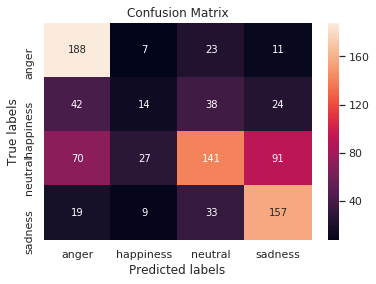


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.82      0.69       229
  happiness       0.25      0.12      0.16       118
    neutral       0.60      0.43      0.50       329
    sadness       0.55      0.72      0.63       218

avg / total       0.54      0.56      0.53       894
 

Train Epoch: 23 [0/3598 (0%)]	Loss: 0.902734

Train Epoch: 23 [640/3598 (18%)]	Loss: 0.969769

Train Epoch: 23 [1280/3598 (35%)]	Loss: 1.107019

Train Epoch: 23 [1920/3598 (53%)]	Loss: 1.038366

Train Epoch: 23 [2560/3598 (70%)]	Loss: 1.148552

Train Epoch: 23 [3200/3598 (88%)]	Loss: 1.145127


Train set: Average loss: 0.0170


Train Accuracy: 1957/3598 (54%)


Test set: Average loss: 0.0167, Accuracy: 483/894 (54%)



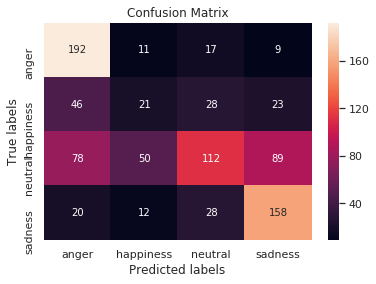


 Classification Report 
              precision    recall  f1-score   support

      anger       0.57      0.84      0.68       229
  happiness       0.22      0.18      0.20       118
    neutral       0.61      0.34      0.44       329
    sadness       0.57      0.72      0.64       218

avg / total       0.54      0.54      0.52       894
 

Train Epoch: 24 [0/3598 (0%)]	Loss: 1.031262

Train Epoch: 24 [640/3598 (18%)]	Loss: 1.167474

Train Epoch: 24 [1280/3598 (35%)]	Loss: 1.165161

Train Epoch: 24 [1920/3598 (53%)]	Loss: 1.175839

Train Epoch: 24 [2560/3598 (70%)]	Loss: 1.036826

Train Epoch: 24 [3200/3598 (88%)]	Loss: 1.141490


Train set: Average loss: 0.0169


Train Accuracy: 1974/3598 (54%)


Test set: Average loss: 0.0166, Accuracy: 481/894 (53%)



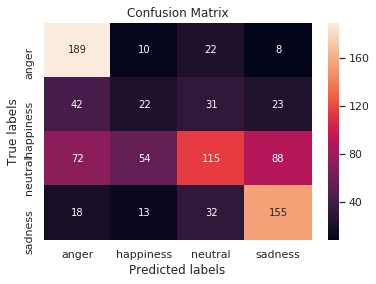


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.83      0.69       229
  happiness       0.22      0.19      0.20       118
    neutral       0.57      0.35      0.43       329
    sadness       0.57      0.71      0.63       218

avg / total       0.53      0.54      0.52       894
 

Train Epoch: 25 [0/3598 (0%)]	Loss: 1.032592

Train Epoch: 25 [640/3598 (18%)]	Loss: 1.108080

Train Epoch: 25 [1280/3598 (35%)]	Loss: 0.913022

Train Epoch: 25 [1920/3598 (53%)]	Loss: 0.984431

Train Epoch: 25 [2560/3598 (70%)]	Loss: 1.098864

Train Epoch: 25 [3200/3598 (88%)]	Loss: 1.118002


Train set: Average loss: 0.0168


Train Accuracy: 1940/3598 (53%)


Test set: Average loss: 0.0165, Accuracy: 486/894 (54%)



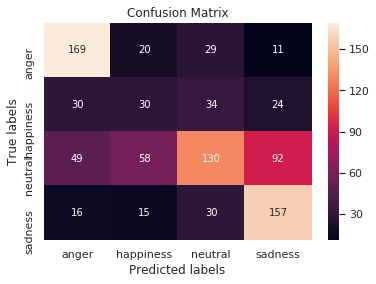


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.74      0.69       229
  happiness       0.24      0.25      0.25       118
    neutral       0.58      0.40      0.47       329
    sadness       0.55      0.72      0.63       218

avg / total       0.55      0.54      0.53       894
 

Train Epoch: 26 [0/3598 (0%)]	Loss: 1.072737

Train Epoch: 26 [640/3598 (18%)]	Loss: 0.911041

Train Epoch: 26 [1280/3598 (35%)]	Loss: 0.972491

Train Epoch: 26 [1920/3598 (53%)]	Loss: 1.026768

Train Epoch: 26 [2560/3598 (70%)]	Loss: 1.071986

Train Epoch: 26 [3200/3598 (88%)]	Loss: 1.234356


Train set: Average loss: 0.0169


Train Accuracy: 1943/3598 (54%)


Test set: Average loss: 0.0167, Accuracy: 473/894 (52%)



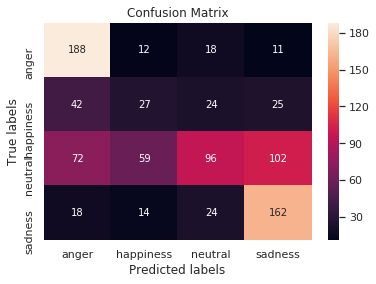


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.82      0.68       229
  happiness       0.24      0.23      0.23       118
    neutral       0.59      0.29      0.39       329
    sadness       0.54      0.74      0.63       218

avg / total       0.53      0.53      0.50       894
 

Train Epoch: 27 [0/3598 (0%)]	Loss: 1.226520

Train Epoch: 27 [640/3598 (18%)]	Loss: 1.055187

Train Epoch: 27 [1280/3598 (35%)]	Loss: 1.007888

Train Epoch: 27 [1920/3598 (53%)]	Loss: 1.152249

Train Epoch: 27 [2560/3598 (70%)]	Loss: 1.028550

Train Epoch: 27 [3200/3598 (88%)]	Loss: 1.007254


Train set: Average loss: 0.0168


Train Accuracy: 1972/3598 (54%)


Test set: Average loss: 0.0167, Accuracy: 474/894 (53%)



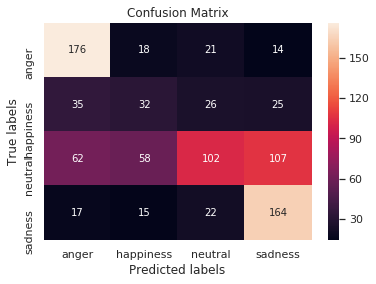


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.77      0.68       229
  happiness       0.26      0.27      0.27       118
    neutral       0.60      0.31      0.41       329
    sadness       0.53      0.75      0.62       218

avg / total       0.54      0.53      0.51       894
 

Train Epoch: 28 [0/3598 (0%)]	Loss: 0.926157

Train Epoch: 28 [640/3598 (18%)]	Loss: 1.002104

Train Epoch: 28 [1280/3598 (35%)]	Loss: 1.203286

Train Epoch: 28 [1920/3598 (53%)]	Loss: 1.009085

Train Epoch: 28 [2560/3598 (70%)]	Loss: 1.029613

Train Epoch: 28 [3200/3598 (88%)]	Loss: 0.963528


Train set: Average loss: 0.0167


Train Accuracy: 1967/3598 (54%)


Test set: Average loss: 0.0166, Accuracy: 472/894 (52%)



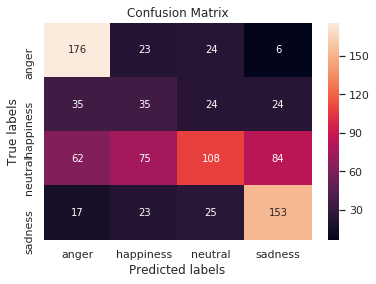


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.77      0.68       229
  happiness       0.22      0.30      0.26       118
    neutral       0.60      0.33      0.42       329
    sadness       0.57      0.70      0.63       218

avg / total       0.54      0.53      0.52       894
 

Train Epoch: 29 [0/3598 (0%)]	Loss: 1.059991

Train Epoch: 29 [640/3598 (18%)]	Loss: 0.967277

Train Epoch: 29 [1280/3598 (35%)]	Loss: 1.116095

Train Epoch: 29 [1920/3598 (53%)]	Loss: 1.114562

Train Epoch: 29 [2560/3598 (70%)]	Loss: 1.126442

Train Epoch: 29 [3200/3598 (88%)]	Loss: 1.152303


Train set: Average loss: 0.0166


Train Accuracy: 1979/3598 (55%)


Test set: Average loss: 0.0163, Accuracy: 496/894 (55%)



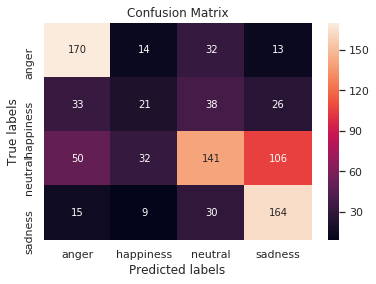


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.74      0.68       229
  happiness       0.28      0.18      0.22       118
    neutral       0.59      0.43      0.49       329
    sadness       0.53      0.75      0.62       218

avg / total       0.54      0.55      0.54       894
 

Train Epoch: 30 [0/3598 (0%)]	Loss: 0.954688

Train Epoch: 30 [640/3598 (18%)]	Loss: 1.085220

Train Epoch: 30 [1280/3598 (35%)]	Loss: 1.051949

Train Epoch: 30 [1920/3598 (53%)]	Loss: 1.148541

Train Epoch: 30 [2560/3598 (70%)]	Loss: 1.077857

Train Epoch: 30 [3200/3598 (88%)]	Loss: 1.023276


Train set: Average loss: 0.0166


Train Accuracy: 2002/3598 (55%)


Test set: Average loss: 0.0164, Accuracy: 485/894 (54%)



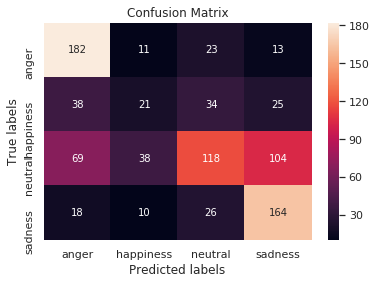


 Classification Report 
              precision    recall  f1-score   support

      anger       0.59      0.79      0.68       229
  happiness       0.26      0.18      0.21       118
    neutral       0.59      0.36      0.45       329
    sadness       0.54      0.75      0.63       218

avg / total       0.53      0.54      0.52       894
 

Train Epoch: 31 [0/3598 (0%)]	Loss: 1.049493

Train Epoch: 31 [640/3598 (18%)]	Loss: 1.042652

Train Epoch: 31 [1280/3598 (35%)]	Loss: 1.075794

Train Epoch: 31 [1920/3598 (53%)]	Loss: 1.019725

Train Epoch: 31 [2560/3598 (70%)]	Loss: 1.113558

Train Epoch: 31 [3200/3598 (88%)]	Loss: 1.024886


Train set: Average loss: 0.0165


Train Accuracy: 2006/3598 (55%)


Test set: Average loss: 0.0164, Accuracy: 492/894 (55%)



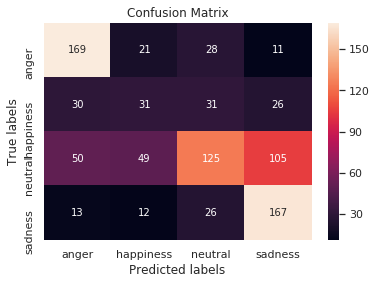


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.74      0.69       229
  happiness       0.27      0.26      0.27       118
    neutral       0.60      0.38      0.46       329
    sadness       0.54      0.77      0.63       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 32 [0/3598 (0%)]	Loss: 0.988403

Train Epoch: 32 [640/3598 (18%)]	Loss: 1.060567

Train Epoch: 32 [1280/3598 (35%)]	Loss: 0.908384

Train Epoch: 32 [1920/3598 (53%)]	Loss: 1.079861

Train Epoch: 32 [2560/3598 (70%)]	Loss: 1.102797

Train Epoch: 32 [3200/3598 (88%)]	Loss: 1.058659


Train set: Average loss: 0.0165


Train Accuracy: 2001/3598 (55%)


Test set: Average loss: 0.0163, Accuracy: 500/894 (55%)



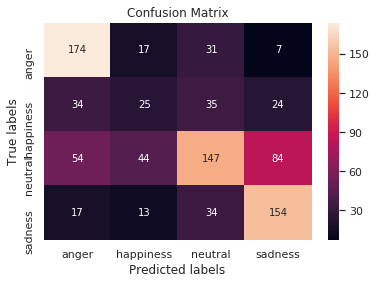


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.76      0.69       229
  happiness       0.25      0.21      0.23       118
    neutral       0.60      0.45      0.51       329
    sadness       0.57      0.71      0.63       218

avg / total       0.55      0.56      0.55       894
 

Train Epoch: 33 [0/3598 (0%)]	Loss: 0.972587

Train Epoch: 33 [640/3598 (18%)]	Loss: 0.971691

Train Epoch: 33 [1280/3598 (35%)]	Loss: 0.992159

Train Epoch: 33 [1920/3598 (53%)]	Loss: 1.086024

Train Epoch: 33 [2560/3598 (70%)]	Loss: 1.132358

Train Epoch: 33 [3200/3598 (88%)]	Loss: 1.042064


Train set: Average loss: 0.0166


Train Accuracy: 2016/3598 (56%)


Test set: Average loss: 0.0163, Accuracy: 488/894 (54%)



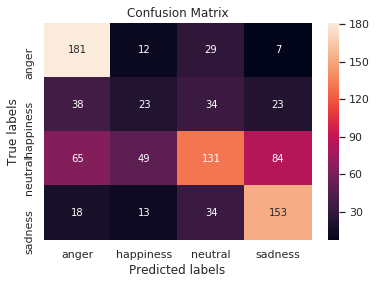


 Classification Report 
              precision    recall  f1-score   support

      anger       0.60      0.79      0.68       229
  happiness       0.24      0.19      0.21       118
    neutral       0.57      0.40      0.47       329
    sadness       0.57      0.70      0.63       218

avg / total       0.54      0.55      0.53       894
 

Train Epoch: 34 [0/3598 (0%)]	Loss: 1.051255

Train Epoch: 34 [640/3598 (18%)]	Loss: 1.025745

Train Epoch: 34 [1280/3598 (35%)]	Loss: 1.004990

Train Epoch: 34 [1920/3598 (53%)]	Loss: 1.021758

Train Epoch: 34 [2560/3598 (70%)]	Loss: 1.104818

Train Epoch: 34 [3200/3598 (88%)]	Loss: 0.921820


Train set: Average loss: 0.0164


Train Accuracy: 1995/3598 (55%)


Test set: Average loss: 0.0164, Accuracy: 486/894 (54%)



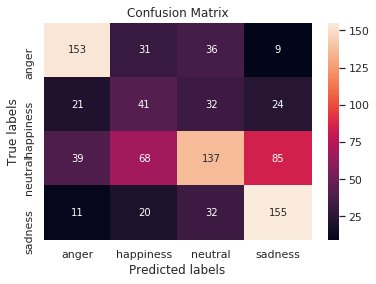


 Classification Report 
              precision    recall  f1-score   support

      anger       0.68      0.67      0.68       229
  happiness       0.26      0.35      0.29       118
    neutral       0.58      0.42      0.48       329
    sadness       0.57      0.71      0.63       218

avg / total       0.56      0.54      0.54       894
 

Train Epoch: 35 [0/3598 (0%)]	Loss: 1.091556

Train Epoch: 35 [640/3598 (18%)]	Loss: 0.853080

Train Epoch: 35 [1280/3598 (35%)]	Loss: 1.136781

Train Epoch: 35 [1920/3598 (53%)]	Loss: 1.090743

Train Epoch: 35 [2560/3598 (70%)]	Loss: 1.058043

Train Epoch: 35 [3200/3598 (88%)]	Loss: 1.022580


Train set: Average loss: 0.0165


Train Accuracy: 1983/3598 (55%)


Test set: Average loss: 0.0165, Accuracy: 475/894 (53%)



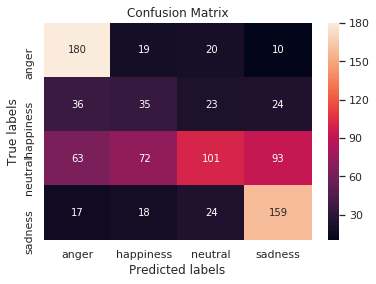


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.79      0.69       229
  happiness       0.24      0.30      0.27       118
    neutral       0.60      0.31      0.41       329
    sadness       0.56      0.73      0.63       218

avg / total       0.54      0.53      0.51       894
 

Train Epoch: 36 [0/3598 (0%)]	Loss: 0.964150

Train Epoch: 36 [640/3598 (18%)]	Loss: 1.107507

Train Epoch: 36 [1280/3598 (35%)]	Loss: 1.033944

Train Epoch: 36 [1920/3598 (53%)]	Loss: 1.032165

Train Epoch: 36 [2560/3598 (70%)]	Loss: 1.103733

Train Epoch: 36 [3200/3598 (88%)]	Loss: 1.044310


Train set: Average loss: 0.0164


Train Accuracy: 2015/3598 (56%)


Test set: Average loss: 0.0162, Accuracy: 500/894 (55%)



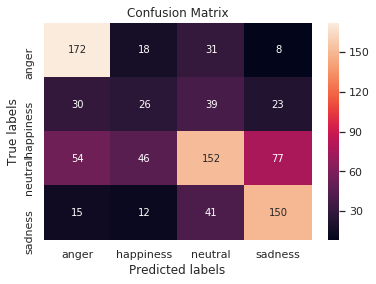


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.75      0.69       229
  happiness       0.25      0.22      0.24       118
    neutral       0.58      0.46      0.51       329
    sadness       0.58      0.69      0.63       218

avg / total       0.55      0.56      0.55       894
 

Train Epoch: 37 [0/3598 (0%)]	Loss: 1.150239

Train Epoch: 37 [640/3598 (18%)]	Loss: 0.974475

Train Epoch: 37 [1280/3598 (35%)]	Loss: 0.868647

Train Epoch: 37 [1920/3598 (53%)]	Loss: 0.950782

Train Epoch: 37 [2560/3598 (70%)]	Loss: 1.000659

Train Epoch: 37 [3200/3598 (88%)]	Loss: 1.123098


Train set: Average loss: 0.0163


Train Accuracy: 2016/3598 (56%)


Test set: Average loss: 0.0164, Accuracy: 483/894 (54%)



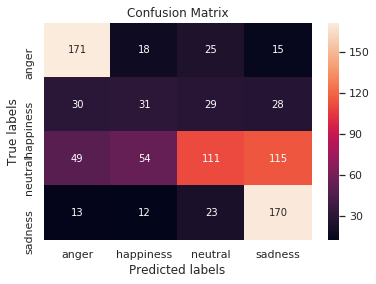


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.75      0.70       229
  happiness       0.27      0.26      0.27       118
    neutral       0.59      0.34      0.43       329
    sadness       0.52      0.78      0.62       218

avg / total       0.55      0.54      0.52       894
 

Train Epoch: 38 [0/3598 (0%)]	Loss: 1.160781

Train Epoch: 38 [640/3598 (18%)]	Loss: 1.075253

Train Epoch: 38 [1280/3598 (35%)]	Loss: 1.087056

Train Epoch: 38 [1920/3598 (53%)]	Loss: 1.094894

Train Epoch: 38 [2560/3598 (70%)]	Loss: 1.052635

Train Epoch: 38 [3200/3598 (88%)]	Loss: 0.963021


Train set: Average loss: 0.0162


Train Accuracy: 2032/3598 (56%)


Test set: Average loss: 0.0162, Accuracy: 487/894 (54%)



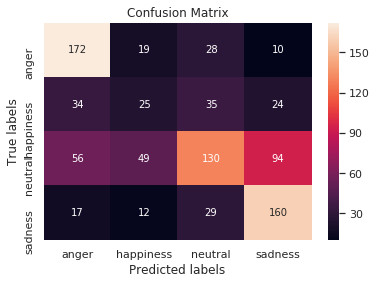


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.75      0.68       229
  happiness       0.24      0.21      0.22       118
    neutral       0.59      0.40      0.47       329
    sadness       0.56      0.73      0.63       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 39 [0/3598 (0%)]	Loss: 0.953140

Train Epoch: 39 [640/3598 (18%)]	Loss: 1.052233

Train Epoch: 39 [1280/3598 (35%)]	Loss: 1.224675

Train Epoch: 39 [1920/3598 (53%)]	Loss: 1.074184

Train Epoch: 39 [2560/3598 (70%)]	Loss: 0.835012

Train Epoch: 39 [3200/3598 (88%)]	Loss: 1.097728


Train set: Average loss: 0.0161


Train Accuracy: 2038/3598 (56%)


Test set: Average loss: 0.0163, Accuracy: 491/894 (54%)



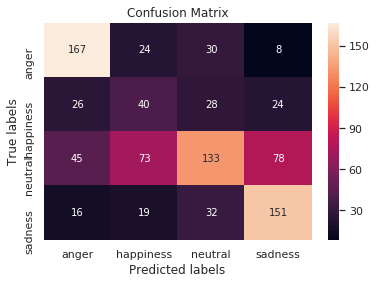


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.73      0.69       229
  happiness       0.26      0.34      0.29       118
    neutral       0.60      0.40      0.48       329
    sadness       0.58      0.69      0.63       218

avg / total       0.56      0.55      0.55       894
 

Train Epoch: 40 [0/3598 (0%)]	Loss: 0.993217

Train Epoch: 40 [640/3598 (18%)]	Loss: 0.972322

Train Epoch: 40 [1280/3598 (35%)]	Loss: 1.124754

Train Epoch: 40 [1920/3598 (53%)]	Loss: 1.170523

Train Epoch: 40 [2560/3598 (70%)]	Loss: 0.991823

Train Epoch: 40 [3200/3598 (88%)]	Loss: 0.875808


Train set: Average loss: 0.0160


Train Accuracy: 2054/3598 (57%)


Test set: Average loss: 0.0162, Accuracy: 486/894 (54%)



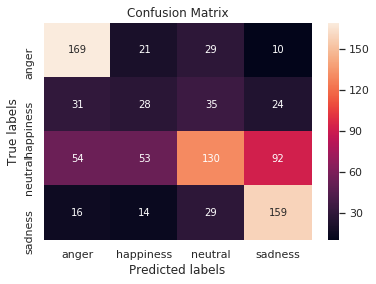


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.74      0.68       229
  happiness       0.24      0.24      0.24       118
    neutral       0.58      0.40      0.47       329
    sadness       0.56      0.73      0.63       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 41 [0/3598 (0%)]	Loss: 0.876070

Train Epoch: 41 [640/3598 (18%)]	Loss: 1.047122

Train Epoch: 41 [1280/3598 (35%)]	Loss: 1.016793

Train Epoch: 41 [1920/3598 (53%)]	Loss: 1.022114

Train Epoch: 41 [2560/3598 (70%)]	Loss: 0.935554

Train Epoch: 41 [3200/3598 (88%)]	Loss: 1.080343


Train set: Average loss: 0.0162


Train Accuracy: 2015/3598 (56%)


Test set: Average loss: 0.0165, Accuracy: 468/894 (52%)



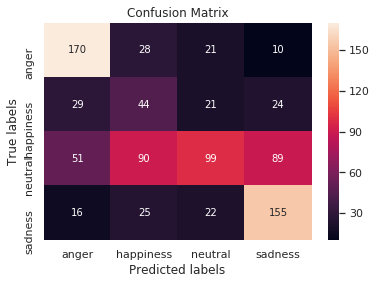


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.74      0.69       229
  happiness       0.24      0.37      0.29       118
    neutral       0.61      0.30      0.40       329
    sadness       0.56      0.71      0.62       218

avg / total       0.55      0.52      0.51       894
 

Train Epoch: 42 [0/3598 (0%)]	Loss: 1.025752

Train Epoch: 42 [640/3598 (18%)]	Loss: 0.988010

Train Epoch: 42 [1280/3598 (35%)]	Loss: 1.119763

Train Epoch: 42 [1920/3598 (53%)]	Loss: 0.930862

Train Epoch: 42 [2560/3598 (70%)]	Loss: 1.005472

Train Epoch: 42 [3200/3598 (88%)]	Loss: 0.926437


Train set: Average loss: 0.0161


Train Accuracy: 2041/3598 (56%)


Test set: Average loss: 0.0163, Accuracy: 483/894 (54%)



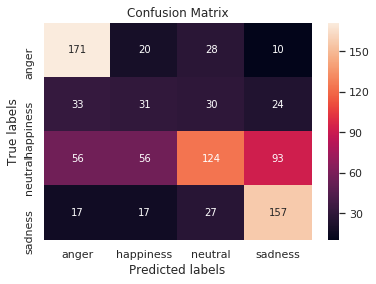


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.75      0.68       229
  happiness       0.25      0.26      0.26       118
    neutral       0.59      0.38      0.46       329
    sadness       0.55      0.72      0.63       218

avg / total       0.54      0.54      0.53       894
 

Train Epoch: 43 [0/3598 (0%)]	Loss: 1.080965

Train Epoch: 43 [640/3598 (18%)]	Loss: 1.190320

Train Epoch: 43 [1280/3598 (35%)]	Loss: 1.009601

Train Epoch: 43 [1920/3598 (53%)]	Loss: 1.025077

Train Epoch: 43 [2560/3598 (70%)]	Loss: 0.987030

Train Epoch: 43 [3200/3598 (88%)]	Loss: 1.099523


Train set: Average loss: 0.0160


Train Accuracy: 2084/3598 (57%)


Test set: Average loss: 0.0162, Accuracy: 494/894 (55%)



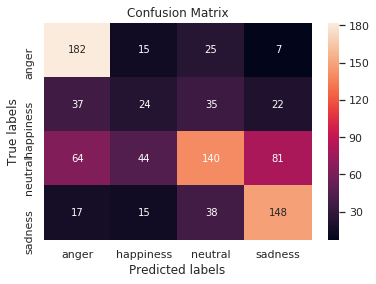


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.79      0.69       229
  happiness       0.24      0.20      0.22       118
    neutral       0.59      0.43      0.49       329
    sadness       0.57      0.68      0.62       218

avg / total       0.54      0.55      0.54       894
 

Train Epoch: 44 [0/3598 (0%)]	Loss: 1.193060

Train Epoch: 44 [640/3598 (18%)]	Loss: 0.947503

Train Epoch: 44 [1280/3598 (35%)]	Loss: 0.924904

Train Epoch: 44 [1920/3598 (53%)]	Loss: 1.116535

Train Epoch: 44 [2560/3598 (70%)]	Loss: 0.941905

Train Epoch: 44 [3200/3598 (88%)]	Loss: 0.965057


Train set: Average loss: 0.0159


Train Accuracy: 2076/3598 (57%)


Test set: Average loss: 0.0163, Accuracy: 473/894 (52%)



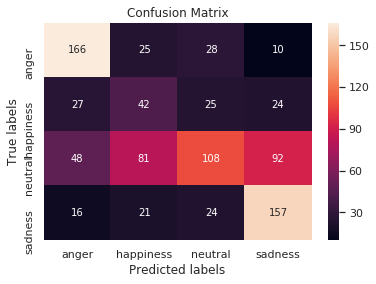


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.72      0.68       229
  happiness       0.25      0.36      0.29       118
    neutral       0.58      0.33      0.42       329
    sadness       0.55      0.72      0.63       218

avg / total       0.55      0.53      0.52       894
 

Train Epoch: 45 [0/3598 (0%)]	Loss: 1.021017

Train Epoch: 45 [640/3598 (18%)]	Loss: 0.928913

Train Epoch: 45 [1280/3598 (35%)]	Loss: 0.948069

Train Epoch: 45 [1920/3598 (53%)]	Loss: 0.982409

Train Epoch: 45 [2560/3598 (70%)]	Loss: 0.994789

Train Epoch: 45 [3200/3598 (88%)]	Loss: 1.089930


Train set: Average loss: 0.0159


Train Accuracy: 2043/3598 (56%)


Test set: Average loss: 0.0163, Accuracy: 481/894 (53%)



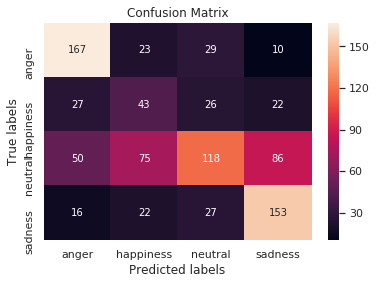


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.73      0.68       229
  happiness       0.26      0.36      0.31       118
    neutral       0.59      0.36      0.45       329
    sadness       0.56      0.70      0.63       218

avg / total       0.55      0.54      0.53       894
 

Train Epoch: 46 [0/3598 (0%)]	Loss: 0.949678

Train Epoch: 46 [640/3598 (18%)]	Loss: 1.118760

Train Epoch: 46 [1280/3598 (35%)]	Loss: 1.092534

Train Epoch: 46 [1920/3598 (53%)]	Loss: 0.967937

Train Epoch: 46 [2560/3598 (70%)]	Loss: 1.051543

Train Epoch: 46 [3200/3598 (88%)]	Loss: 0.882343


Train set: Average loss: 0.0159


Train Accuracy: 2058/3598 (57%)


Test set: Average loss: 0.0161, Accuracy: 491/894 (54%)



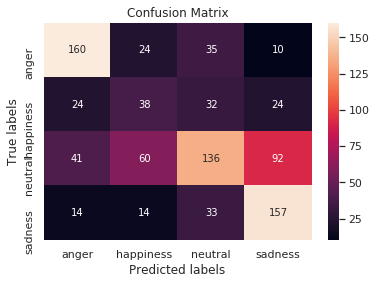


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.70      0.68       229
  happiness       0.28      0.32      0.30       118
    neutral       0.58      0.41      0.48       329
    sadness       0.55      0.72      0.63       218

avg / total       0.56      0.55      0.54       894
 

Train Epoch: 47 [0/3598 (0%)]	Loss: 1.106827

Train Epoch: 47 [640/3598 (18%)]	Loss: 0.949684

Train Epoch: 47 [1280/3598 (35%)]	Loss: 1.043527

Train Epoch: 47 [1920/3598 (53%)]	Loss: 1.044220

Train Epoch: 47 [2560/3598 (70%)]	Loss: 1.048908

Train Epoch: 47 [3200/3598 (88%)]	Loss: 0.896198


Train set: Average loss: 0.0160


Train Accuracy: 2064/3598 (57%)


Test set: Average loss: 0.0161, Accuracy: 492/894 (55%)



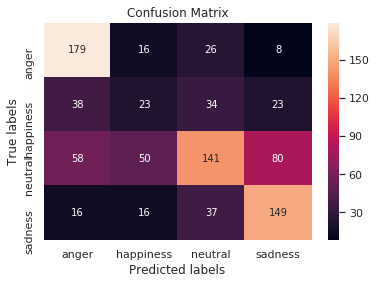


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.78      0.69       229
  happiness       0.22      0.19      0.21       118
    neutral       0.59      0.43      0.50       329
    sadness       0.57      0.68      0.62       218

avg / total       0.54      0.55      0.54       894
 

Train Epoch: 48 [0/3598 (0%)]	Loss: 0.912006

Train Epoch: 48 [640/3598 (18%)]	Loss: 1.018852

Train Epoch: 48 [1280/3598 (35%)]	Loss: 1.023494

Train Epoch: 48 [1920/3598 (53%)]	Loss: 0.993948

Train Epoch: 48 [2560/3598 (70%)]	Loss: 1.048023

Train Epoch: 48 [3200/3598 (88%)]	Loss: 0.957267


Train set: Average loss: 0.0157


Train Accuracy: 2108/3598 (58%)


Test set: Average loss: 0.0162, Accuracy: 490/894 (54%)



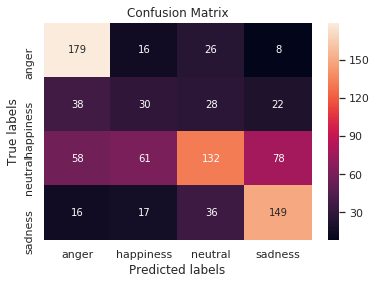


 Classification Report 
              precision    recall  f1-score   support

      anger       0.62      0.78      0.69       229
  happiness       0.24      0.25      0.25       118
    neutral       0.59      0.40      0.48       329
    sadness       0.58      0.68      0.63       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 49 [0/3598 (0%)]	Loss: 1.052342

Train Epoch: 49 [640/3598 (18%)]	Loss: 0.950067

Train Epoch: 49 [1280/3598 (35%)]	Loss: 1.207566

Train Epoch: 49 [1920/3598 (53%)]	Loss: 1.004685

Train Epoch: 49 [2560/3598 (70%)]	Loss: 1.041246

Train Epoch: 49 [3200/3598 (88%)]	Loss: 0.866637


Train set: Average loss: 0.0158


Train Accuracy: 2064/3598 (57%)


Test set: Average loss: 0.0163, Accuracy: 482/894 (53%)



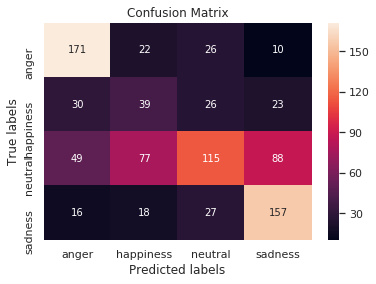


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.75      0.69       229
  happiness       0.25      0.33      0.28       118
    neutral       0.59      0.35      0.44       329
    sadness       0.56      0.72      0.63       218

avg / total       0.55      0.54      0.53       894
 

Train Epoch: 50 [0/3598 (0%)]	Loss: 0.834178

Train Epoch: 50 [640/3598 (18%)]	Loss: 1.040142

Train Epoch: 50 [1280/3598 (35%)]	Loss: 0.978487

Train Epoch: 50 [1920/3598 (53%)]	Loss: 1.015657

Train Epoch: 50 [2560/3598 (70%)]	Loss: 0.968559

Train Epoch: 50 [3200/3598 (88%)]	Loss: 1.046071


Train set: Average loss: 0.0157


Train Accuracy: 2076/3598 (57%)


Test set: Average loss: 0.0161, Accuracy: 492/894 (55%)



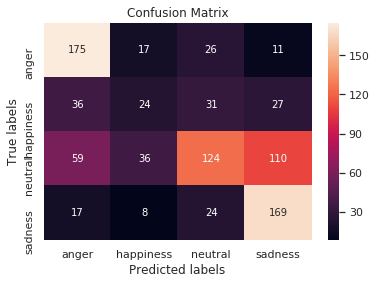


 Classification Report 
              precision    recall  f1-score   support

      anger       0.61      0.76      0.68       229
  happiness       0.28      0.20      0.24       118
    neutral       0.60      0.38      0.46       329
    sadness       0.53      0.78      0.63       218

avg / total       0.55      0.55      0.53       894
 



In [310]:
history = []
n_epoch = 51
for epoch in range(1, n_epoch):
#     exp_lr_scheduler.step(epoch)
    
    train_loss, train_acc = train(epoch, model)
    
    test_loss, test_acc = test(model)
    
#     plateau_scheduler.step(test_loss)
    
    history.append([train_loss, train_acc, test_loss, test_acc])

In [311]:
history_df = pd.DataFrame(history, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [312]:
history_df["epoch"] = [x for x in range(1, n_epoch)]

In [313]:
history_df

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.022020,27,0.020707,41,1
1,0.021145,36,0.020272,45,2
2,0.020453,41,0.019592,48,3
3,0.019872,43,0.018974,50,4
4,0.019530,45,0.018541,53,5
5,0.019154,47,0.018229,53,6
6,0.018793,48,0.018240,47,7
7,0.018649,47,0.017711,54,8
8,0.018258,49,0.017533,55,9
9,0.018306,49,0.017411,54,10


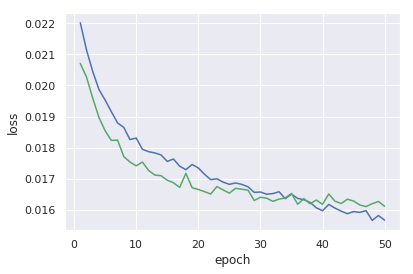

In [314]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_df, color='b')
# plt.xticks(history_df.epoch)
sns.lineplot(x='epoch', y='test_loss', data=history_df, color='g')
plt.ylabel("loss")
plt.show()

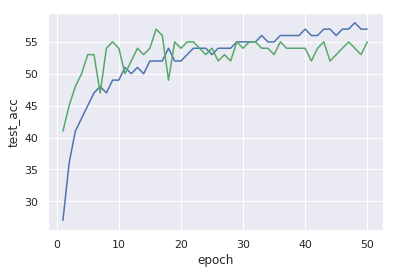

In [315]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_df, color='b')
# plt.xticks(history_df.epoch)
sns.lineplot(x='epoch', y='test_acc', data=history_df, color='g')
plt.show()

In [316]:
torch.save(model, model_save_path + '/ResNet18_Freeze_Weights.pth')

In [317]:
model = torch.load(model_save_path + '/ResNet18_Freeze_Weights.pth')

In [318]:
ct = 0
for child in model.children():
    ct += 1
    if ct > 7:
        print("child", ct, "was not frozen")
        for param in child.parameters():
            param.requires_grad = True
    else:
        print("child", ct, "was frozen")

child 1 was frozen
child 2 was frozen
child 3 was frozen
child 4 was frozen
child 5 was frozen
child 6 was frozen
child 7 was frozen
child 8 was not frozen
child 9 was not frozen
child 10 was not frozen


In [319]:
# for param in model.parameters():
#     param.requires_grad = True

In [320]:
# optimizer = optim.RMSprop(model.parameters(), lr=0.0003)
# exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0005)
model = model.to(device)

In [321]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

11,279,916 total parameters.
8,497,132 training parameters.


In [322]:
model = model.to(device)

Train Epoch: 1 [0/3598 (0%)]	Loss: 1.028540

Train Epoch: 1 [640/3598 (18%)]	Loss: 1.021516

Train Epoch: 1 [1280/3598 (35%)]	Loss: 1.009090

Train Epoch: 1 [1920/3598 (53%)]	Loss: 0.978924

Train Epoch: 1 [2560/3598 (70%)]	Loss: 0.869172

Train Epoch: 1 [3200/3598 (88%)]	Loss: 1.024445


Train set: Average loss: 0.0155


Train Accuracy: 2103/3598 (58%)


Test set: Average loss: 0.0161, Accuracy: 487/894 (54%)



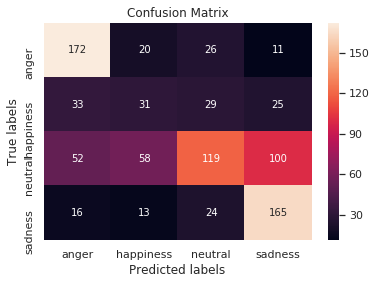


 Classification Report 
              precision    recall  f1-score   support

      anger       0.63      0.75      0.69       229
  happiness       0.25      0.26      0.26       118
    neutral       0.60      0.36      0.45       329
    sadness       0.55      0.76      0.64       218

avg / total       0.55      0.54      0.53       894
 

Train Epoch: 2 [0/3598 (0%)]	Loss: 1.052624

Train Epoch: 2 [640/3598 (18%)]	Loss: 0.948329

Train Epoch: 2 [1280/3598 (35%)]	Loss: 0.936625

Train Epoch: 2 [1920/3598 (53%)]	Loss: 1.073369

Train Epoch: 2 [2560/3598 (70%)]	Loss: 0.970306

Train Epoch: 2 [3200/3598 (88%)]	Loss: 0.931553


Train set: Average loss: 0.0153


Train Accuracy: 2080/3598 (57%)


Test set: Average loss: 0.0160, Accuracy: 488/894 (54%)



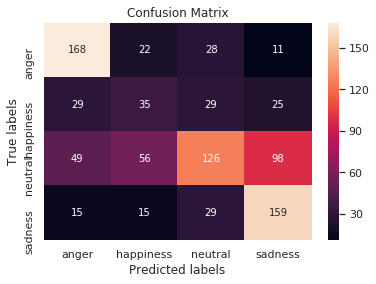


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.73      0.69       229
  happiness       0.27      0.30      0.28       118
    neutral       0.59      0.38      0.47       329
    sadness       0.54      0.73      0.62       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 3 [0/3598 (0%)]	Loss: 0.983488

Train Epoch: 3 [640/3598 (18%)]	Loss: 0.848548

Train Epoch: 3 [1280/3598 (35%)]	Loss: 1.066905

Train Epoch: 3 [1920/3598 (53%)]	Loss: 1.021078

Train Epoch: 3 [2560/3598 (70%)]	Loss: 0.964306

Train Epoch: 3 [3200/3598 (88%)]	Loss: 0.955749


Train set: Average loss: 0.0154


Train Accuracy: 2152/3598 (59%)


Test set: Average loss: 0.0160, Accuracy: 487/894 (54%)



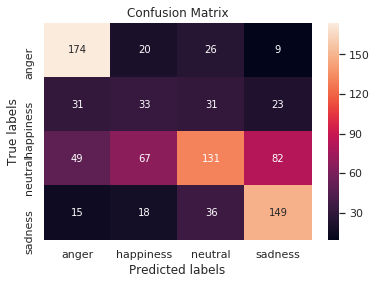


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.76      0.70       229
  happiness       0.24      0.28      0.26       118
    neutral       0.58      0.40      0.47       329
    sadness       0.57      0.68      0.62       218

avg / total       0.55      0.54      0.54       894
 

Train Epoch: 4 [0/3598 (0%)]	Loss: 0.993165

Train Epoch: 4 [640/3598 (18%)]	Loss: 0.915663

Train Epoch: 4 [1280/3598 (35%)]	Loss: 0.882583

Train Epoch: 4 [1920/3598 (53%)]	Loss: 0.888379

Train Epoch: 4 [2560/3598 (70%)]	Loss: 0.924064

Train Epoch: 4 [3200/3598 (88%)]	Loss: 0.822145


Train set: Average loss: 0.0152


Train Accuracy: 2134/3598 (59%)


Test set: Average loss: 0.0160, Accuracy: 496/894 (55%)



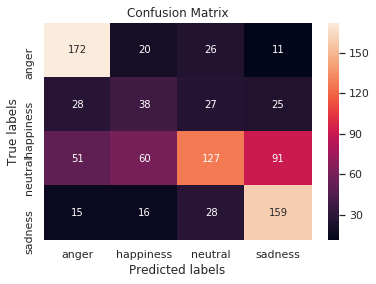


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.75      0.69       229
  happiness       0.28      0.32      0.30       118
    neutral       0.61      0.39      0.47       329
    sadness       0.56      0.73      0.63       218

avg / total       0.56      0.55      0.55       894
 

Train Epoch: 5 [0/3598 (0%)]	Loss: 0.930075

Train Epoch: 5 [640/3598 (18%)]	Loss: 0.926693

Train Epoch: 5 [1280/3598 (35%)]	Loss: 0.982804

Train Epoch: 5 [1920/3598 (53%)]	Loss: 1.099265

Train Epoch: 5 [2560/3598 (70%)]	Loss: 0.959236

Train Epoch: 5 [3200/3598 (88%)]	Loss: 0.878495


Train set: Average loss: 0.0150


Train Accuracy: 2152/3598 (59%)


Test set: Average loss: 0.0160, Accuracy: 486/894 (54%)



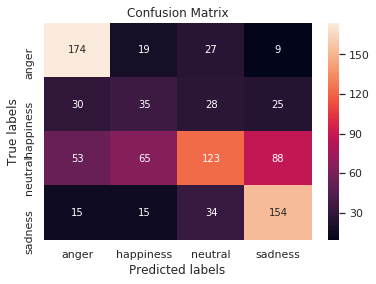


 Classification Report 
              precision    recall  f1-score   support

      anger       0.64      0.76      0.69       229
  happiness       0.26      0.30      0.28       118
    neutral       0.58      0.37      0.45       329
    sadness       0.56      0.71      0.62       218

avg / total       0.55      0.54      0.53       894
 

Train Epoch: 6 [0/3598 (0%)]	Loss: 0.961128

Train Epoch: 6 [640/3598 (18%)]	Loss: 0.957043

Train Epoch: 6 [1280/3598 (35%)]	Loss: 0.929822

Train Epoch: 6 [1920/3598 (53%)]	Loss: 1.156011

Train Epoch: 6 [2560/3598 (70%)]	Loss: 0.967498

Train Epoch: 6 [3200/3598 (88%)]	Loss: 0.945522


Train set: Average loss: 0.0151


Train Accuracy: 2166/3598 (60%)


Test set: Average loss: 0.0159, Accuracy: 497/894 (55%)



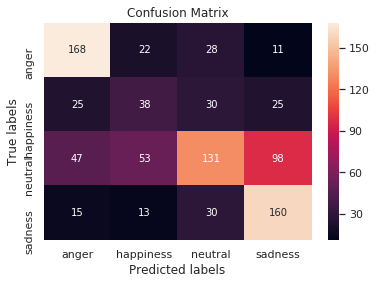


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.73      0.69       229
  happiness       0.30      0.32      0.31       118
    neutral       0.60      0.40      0.48       329
    sadness       0.54      0.73      0.62       218

avg / total       0.56      0.56      0.55       894
 

Train Epoch: 7 [0/3598 (0%)]	Loss: 0.992739

Train Epoch: 7 [640/3598 (18%)]	Loss: 0.929836

Train Epoch: 7 [1280/3598 (35%)]	Loss: 0.845348

Train Epoch: 7 [1920/3598 (53%)]	Loss: 0.941270

Train Epoch: 7 [2560/3598 (70%)]	Loss: 0.832599

Train Epoch: 7 [3200/3598 (88%)]	Loss: 0.888092


Train set: Average loss: 0.0150


Train Accuracy: 2157/3598 (59%)


Test set: Average loss: 0.0159, Accuracy: 493/894 (55%)



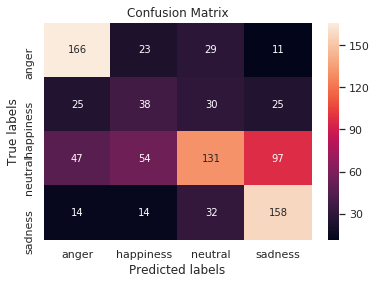


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.72      0.69       229
  happiness       0.29      0.32      0.31       118
    neutral       0.59      0.40      0.48       329
    sadness       0.54      0.72      0.62       218

avg / total       0.56      0.55      0.54       894
 

Train Epoch: 8 [0/3598 (0%)]	Loss: 0.933829

Train Epoch: 8 [640/3598 (18%)]	Loss: 0.858838

Train Epoch: 8 [1280/3598 (35%)]	Loss: 1.031070

Train Epoch: 8 [1920/3598 (53%)]	Loss: 0.894024

Train Epoch: 8 [2560/3598 (70%)]	Loss: 1.011930

Train Epoch: 8 [3200/3598 (88%)]	Loss: 0.878434


Train set: Average loss: 0.0150


Train Accuracy: 2132/3598 (59%)


Test set: Average loss: 0.0159, Accuracy: 497/894 (55%)



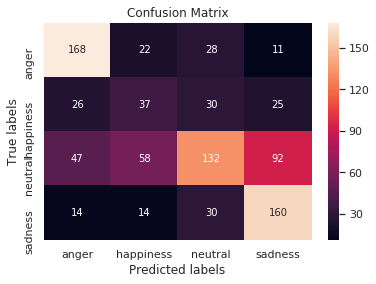


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.73      0.69       229
  happiness       0.28      0.31      0.30       118
    neutral       0.60      0.40      0.48       329
    sadness       0.56      0.73      0.63       218

avg / total       0.56      0.56      0.55       894
 

Train Epoch: 9 [0/3598 (0%)]	Loss: 1.007922

Train Epoch: 9 [640/3598 (18%)]	Loss: 1.171889

Train Epoch: 9 [1280/3598 (35%)]	Loss: 0.921609

Train Epoch: 9 [1920/3598 (53%)]	Loss: 0.920458

Train Epoch: 9 [2560/3598 (70%)]	Loss: 0.906329

Train Epoch: 9 [3200/3598 (88%)]	Loss: 1.074416


Train set: Average loss: 0.0149


Train Accuracy: 2160/3598 (60%)


Test set: Average loss: 0.0158, Accuracy: 505/894 (56%)



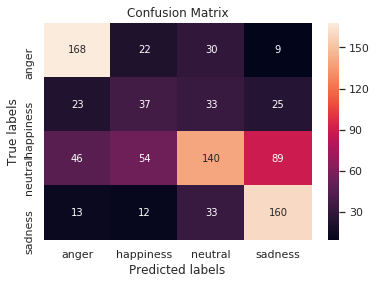


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.73      0.70       229
  happiness       0.30      0.31      0.30       118
    neutral       0.59      0.43      0.50       329
    sadness       0.57      0.73      0.64       218

avg / total       0.57      0.56      0.56       894
 

Train Epoch: 10 [0/3598 (0%)]	Loss: 0.842789

Train Epoch: 10 [640/3598 (18%)]	Loss: 0.981164

Train Epoch: 10 [1280/3598 (35%)]	Loss: 1.073960

Train Epoch: 10 [1920/3598 (53%)]	Loss: 0.890861

Train Epoch: 10 [2560/3598 (70%)]	Loss: 0.963145

Train Epoch: 10 [3200/3598 (88%)]	Loss: 0.869669


Train set: Average loss: 0.0148


Train Accuracy: 2169/3598 (60%)


Test set: Average loss: 0.0158, Accuracy: 502/894 (56%)



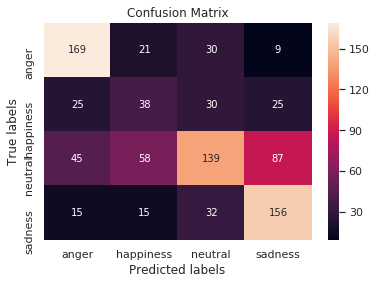


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.74      0.70       229
  happiness       0.29      0.32      0.30       118
    neutral       0.60      0.42      0.50       329
    sadness       0.56      0.72      0.63       218

avg / total       0.57      0.56      0.56       894
 



In [324]:
history_unfreeze = []
n_epoch_unfrz = 11
for epoch in range(1, n_epoch_unfrz):
#     exp_lr_scheduler.step(epoch)
    
    train_loss, train_acc = train(epoch, model)
    
    test_loss, test_acc = test(model)
    
    history_unfreeze.append([train_loss, train_acc, test_loss, test_acc])

In [325]:
history_df_unfrz = pd.DataFrame(history_unfreeze, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [326]:
history_df_unfrz["epoch"] = [x for x in range(n_epoch, n_epoch + n_epoch_unfrz - 1)]

In [327]:
history_df_unfrz

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.015534,58,0.016118,54,51
1,0.015346,57,0.016048,54,52
2,0.015369,59,0.016033,54,53
3,0.015248,59,0.016004,55,54
4,0.015005,59,0.015990,54,55
5,0.015096,60,0.015925,55,56
6,0.014958,59,0.015899,55,57
7,0.015019,59,0.015852,55,58
8,0.014893,60,0.015789,56,59
9,0.014774,60,0.015841,56,60


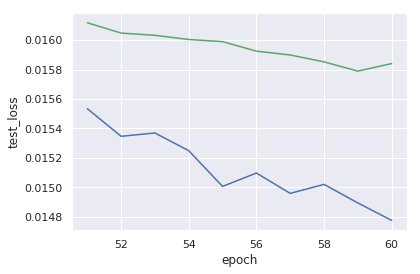

In [328]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_df_unfrz, color='b')
sns.lineplot(x='epoch', y='test_loss', data=history_df_unfrz, color='g')
plt.show()
# plt.xticks()

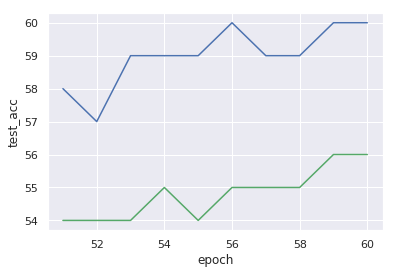

In [329]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_df_unfrz, color='b')
sns.lineplot(x='epoch', y='test_acc', data=history_df_unfrz, color='g')
plt.show()
# plt.xticks()

In [330]:
torch.save(model, model_save_path + '/ResNet18_UnFreeze_Weights.pth')

In [331]:
history_total = pd.concat([history_df, history_df_unfrz])

In [332]:
history_total

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.022020,27,0.020707,41,1
1,0.021145,36,0.020272,45,2
2,0.020453,41,0.019592,48,3
3,0.019872,43,0.018974,50,4
4,0.019530,45,0.018541,53,5
5,0.019154,47,0.018229,53,6
6,0.018793,48,0.018240,47,7
7,0.018649,47,0.017711,54,8
8,0.018258,49,0.017533,55,9
9,0.018306,49,0.017411,54,10


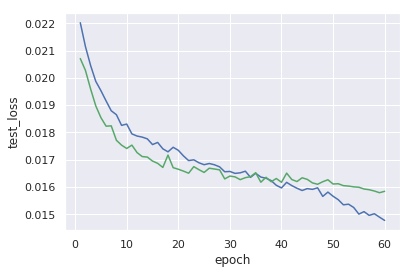

In [333]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_total, color='b')
sns.lineplot(x='epoch', y='test_loss', data=history_total, color='g')
plt.show()
# plt.xticks()

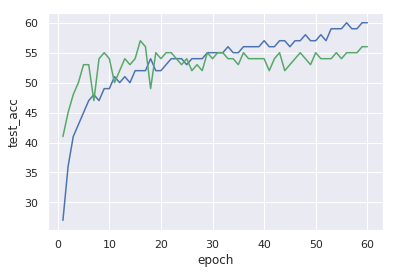

In [334]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_total, color='b')
sns.lineplot(x='epoch', y='test_acc', data=history_total, color='g')
plt.show()
# plt.xticks()

Experiment with SGD

In [177]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
model = model.to(device)

In [178]:
for param in model.parameters():
    param.requires_grad = True

Train Epoch: 1 [0/3598 (0%)]	Loss: 0.950700

Train Epoch: 1 [640/3598 (18%)]	Loss: 1.100819

Train Epoch: 1 [1280/3598 (35%)]	Loss: 0.995338

Train Epoch: 1 [1920/3598 (53%)]	Loss: 0.917979

Train Epoch: 1 [2560/3598 (70%)]	Loss: 0.862834

Train Epoch: 1 [3200/3598 (88%)]	Loss: 0.895166


Train set: Average loss: 0.0153


Train Accuracy: 2117/3598 (58%)


Test set: Average loss: 0.0161, Accuracy: 494/894 (55%)



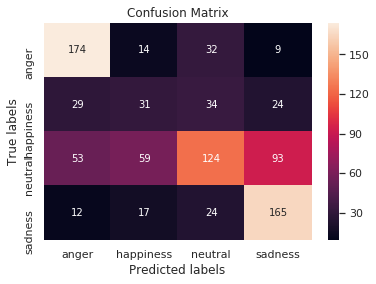


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.76      0.70       229
  happiness       0.26      0.26      0.26       118
    neutral       0.58      0.38      0.46       329
    sadness       0.57      0.76      0.65       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 2 [0/3598 (0%)]	Loss: 0.964692

Train Epoch: 2 [640/3598 (18%)]	Loss: 0.959239

Train Epoch: 2 [1280/3598 (35%)]	Loss: 0.775868

Train Epoch: 2 [1920/3598 (53%)]	Loss: 1.051539

Train Epoch: 2 [2560/3598 (70%)]	Loss: 0.991115

Train Epoch: 2 [3200/3598 (88%)]	Loss: 1.084355


Train set: Average loss: 0.0153


Train Accuracy: 2143/3598 (59%)


Test set: Average loss: 0.0160, Accuracy: 492/894 (55%)



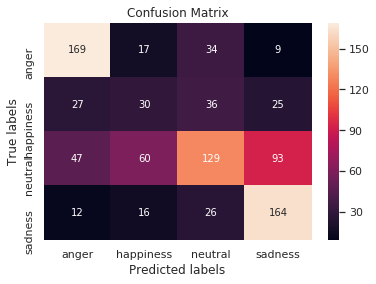


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.74      0.70       229
  happiness       0.24      0.25      0.25       118
    neutral       0.57      0.39      0.47       329
    sadness       0.56      0.75      0.64       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 3 [0/3598 (0%)]	Loss: 0.896261

Train Epoch: 3 [640/3598 (18%)]	Loss: 0.910735

Train Epoch: 3 [1280/3598 (35%)]	Loss: 0.899552

Train Epoch: 3 [1920/3598 (53%)]	Loss: 0.959506

Train Epoch: 3 [2560/3598 (70%)]	Loss: 0.919958

Train Epoch: 3 [3200/3598 (88%)]	Loss: 1.074826


Train set: Average loss: 0.0151


Train Accuracy: 2157/3598 (59%)


Test set: Average loss: 0.0161, Accuracy: 496/894 (55%)



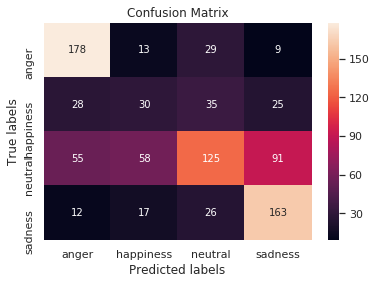


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.78      0.71       229
  happiness       0.25      0.25      0.25       118
    neutral       0.58      0.38      0.46       329
    sadness       0.57      0.75      0.64       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 4 [0/3598 (0%)]	Loss: 0.981046

Train Epoch: 4 [640/3598 (18%)]	Loss: 0.991890

Train Epoch: 4 [1280/3598 (35%)]	Loss: 1.021672

Train Epoch: 4 [1920/3598 (53%)]	Loss: 0.858698

Train Epoch: 4 [2560/3598 (70%)]	Loss: 0.923776

Train Epoch: 4 [3200/3598 (88%)]	Loss: 0.966915


Train set: Average loss: 0.0151


Train Accuracy: 2162/3598 (60%)


Test set: Average loss: 0.0161, Accuracy: 491/894 (54%)



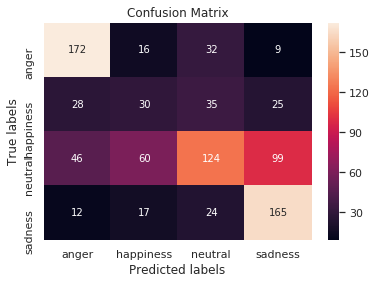


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.75      0.71       229
  happiness       0.24      0.25      0.25       118
    neutral       0.58      0.38      0.46       329
    sadness       0.55      0.76      0.64       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 5 [0/3598 (0%)]	Loss: 0.879074

Train Epoch: 5 [640/3598 (18%)]	Loss: 1.041826

Train Epoch: 5 [1280/3598 (35%)]	Loss: 0.873748

Train Epoch: 5 [1920/3598 (53%)]	Loss: 0.898347

Train Epoch: 5 [2560/3598 (70%)]	Loss: 0.987719

Train Epoch: 5 [3200/3598 (88%)]	Loss: 0.870551


Train set: Average loss: 0.0152


Train Accuracy: 2142/3598 (59%)


Test set: Average loss: 0.0161, Accuracy: 494/894 (55%)



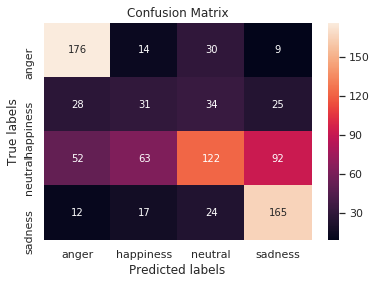


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.77      0.71       229
  happiness       0.25      0.26      0.26       118
    neutral       0.58      0.37      0.45       329
    sadness       0.57      0.76      0.65       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 6 [0/3598 (0%)]	Loss: 0.904033

Train Epoch: 6 [640/3598 (18%)]	Loss: 0.885211

Train Epoch: 6 [1280/3598 (35%)]	Loss: 1.131952

Train Epoch: 6 [1920/3598 (53%)]	Loss: 0.898213

Train Epoch: 6 [2560/3598 (70%)]	Loss: 1.026753

Train Epoch: 6 [3200/3598 (88%)]	Loss: 0.914200


Train set: Average loss: 0.0150


Train Accuracy: 2156/3598 (59%)


Test set: Average loss: 0.0160, Accuracy: 502/894 (56%)



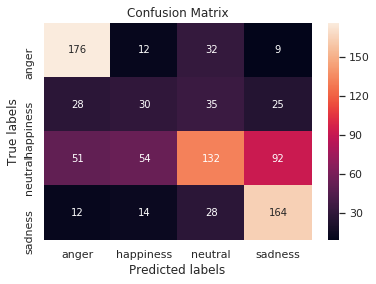


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.77      0.71       229
  happiness       0.27      0.25      0.26       118
    neutral       0.58      0.40      0.47       329
    sadness       0.57      0.75      0.65       218

avg / total       0.56      0.56      0.55       894
 

Train Epoch: 7 [0/3598 (0%)]	Loss: 0.886828

Train Epoch: 7 [640/3598 (18%)]	Loss: 1.014215

Train Epoch: 7 [1280/3598 (35%)]	Loss: 0.950739

Train Epoch: 7 [1920/3598 (53%)]	Loss: 0.906827

Train Epoch: 7 [2560/3598 (70%)]	Loss: 1.007272

Train Epoch: 7 [3200/3598 (88%)]	Loss: 0.968259


Train set: Average loss: 0.0154


Train Accuracy: 2133/3598 (59%)


Test set: Average loss: 0.0161, Accuracy: 486/894 (54%)



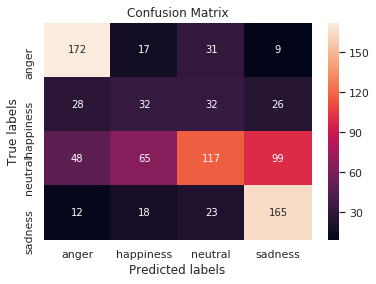


 Classification Report 
              precision    recall  f1-score   support

      anger       0.66      0.75      0.70       229
  happiness       0.24      0.27      0.26       118
    neutral       0.58      0.36      0.44       329
    sadness       0.55      0.76      0.64       218

avg / total       0.55      0.54      0.53       894
 

Train Epoch: 8 [0/3598 (0%)]	Loss: 0.936902

Train Epoch: 8 [640/3598 (18%)]	Loss: 1.005028

Train Epoch: 8 [1280/3598 (35%)]	Loss: 0.968689

Train Epoch: 8 [1920/3598 (53%)]	Loss: 0.987955

Train Epoch: 8 [2560/3598 (70%)]	Loss: 0.995111

Train Epoch: 8 [3200/3598 (88%)]	Loss: 1.047763


Train set: Average loss: 0.0151


Train Accuracy: 2163/3598 (60%)


Test set: Average loss: 0.0161, Accuracy: 492/894 (55%)



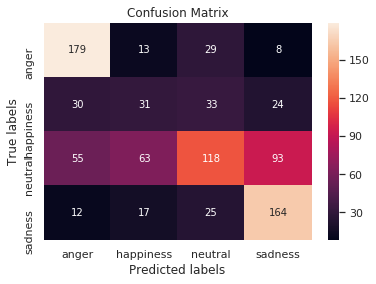


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.78      0.71       229
  happiness       0.25      0.26      0.26       118
    neutral       0.58      0.36      0.44       329
    sadness       0.57      0.75      0.65       218

avg / total       0.55      0.55      0.54       894
 

Train Epoch: 9 [0/3598 (0%)]	Loss: 0.922930

Train Epoch: 9 [640/3598 (18%)]	Loss: 1.014903

Train Epoch: 9 [1280/3598 (35%)]	Loss: 0.826217

Train Epoch: 9 [1920/3598 (53%)]	Loss: 0.771924

Train Epoch: 9 [2560/3598 (70%)]	Loss: 0.929127

Train Epoch: 9 [3200/3598 (88%)]	Loss: 1.026602


Train set: Average loss: 0.0151


Train Accuracy: 2134/3598 (59%)


Test set: Average loss: 0.0161, Accuracy: 489/894 (54%)



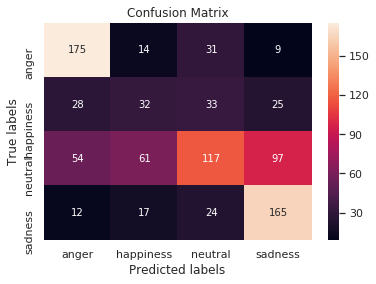


 Classification Report 
              precision    recall  f1-score   support

      anger       0.65      0.76      0.70       229
  happiness       0.26      0.27      0.26       118
    neutral       0.57      0.36      0.44       329
    sadness       0.56      0.76      0.64       218

avg / total       0.55      0.55      0.53       894
 

Train Epoch: 10 [0/3598 (0%)]	Loss: 1.000209

Train Epoch: 10 [640/3598 (18%)]	Loss: 1.043470

Train Epoch: 10 [1280/3598 (35%)]	Loss: 1.055903

Train Epoch: 10 [1920/3598 (53%)]	Loss: 0.921574

Train Epoch: 10 [2560/3598 (70%)]	Loss: 0.863383

Train Epoch: 10 [3200/3598 (88%)]	Loss: 0.889413


Train set: Average loss: 0.0152


Train Accuracy: 2115/3598 (58%)


Test set: Average loss: 0.0161, Accuracy: 487/894 (54%)



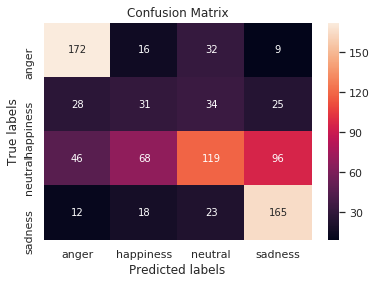


 Classification Report 
              precision    recall  f1-score   support

      anger       0.67      0.75      0.71       229
  happiness       0.23      0.26      0.25       118
    neutral       0.57      0.36      0.44       329
    sadness       0.56      0.76      0.64       218

avg / total       0.55      0.54      0.53       894
 



In [179]:
history_unfreeze_full = []
n_epoch_unfrz_full = 11
for epoch in range(1, n_epoch_unfrz_full):
#     exp_lr_scheduler.step(epoch)
    
    train_loss, train_acc = train(epoch, model)
    
    test_loss, test_acc = test(model)
    
    history_unfreeze_full.append([train_loss, train_acc, test_loss, test_acc])

In [180]:
history_df_unfrz_full = pd.DataFrame(history_unfreeze_full, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [181]:
history_df_unfrz_full["epoch"] = [x for x in range(n_epoch_unfrz, n_epoch_unfrz + n_epoch_unfrz_full - 1)]

In [182]:
history_df_unfrz_full

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.015344,58,0.016058,55,26
1,0.015269,59,0.016046,55,27
2,0.015096,59,0.016076,55,28
3,0.015079,60,0.016051,54,29
4,0.015208,59,0.016079,55,30
5,0.014997,59,0.016027,56,31
6,0.015354,59,0.016101,54,32
7,0.015065,60,0.016067,55,33
8,0.015139,59,0.016058,54,34
9,0.015246,58,0.016077,54,35


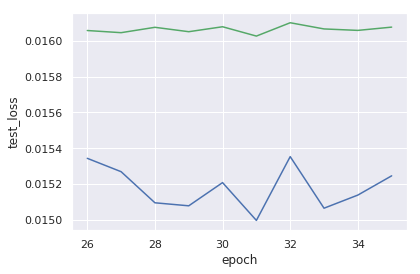

In [183]:
sns.set()
sns.lineplot(x='epoch', y='train_loss', data=history_df_unfrz_full, color='b')
sns.lineplot(x='epoch', y='test_loss', data=history_df_unfrz_full, color='g')
plt.show()
# plt.xticks()

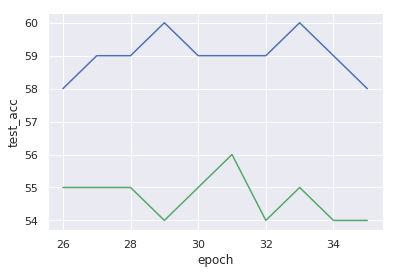

In [184]:
sns.set()
sns.lineplot(x='epoch', y='train_acc', data=history_df_unfrz_full, color='b')
sns.lineplot(x='epoch', y='test_acc', data=history_df_unfrz_full, color='g')
plt.show()
# plt.xticks()